In [1]:
# ============================================================================
# PHASE 1: PROJECT SELECTION
# ============================================================================
"""
PROJECT: Customer Churn Prediction

GOAL: Predict if a customer will leave the company (Churn = Yes/No)

WHY: Keeping customers is cheaper than finding new ones!
"""
print("="*70)
print("PROJECT: Predicting Customer Churn")
print("="*70)
print("✓ Phase 1 Complete!\n")


PROJECT: Predicting Customer Churn
✓ Phase 1 Complete!



In [2]:
# ============================================================================
# PHASE 2: DATA COLLECTION
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set random seed for reproducibility
np.random.seed(42)

print("PHASE 2: DATA COLLECTION")
print("="*70)

# Create sample customer data (1000 customers)
n = 1000
data = {
    'Gender': np.random.choice(['Male', 'Female'], n),
    'SeniorCitizen': np.random.choice([0, 1], n, p=[0.85, 0.15]),
    'Partner': np.random.choice(['Yes', 'No'], n),
    'Tenure': np.random.randint(1, 73, n),  # months with company
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], n),
    'MonthlyCharges': np.random.uniform(20, 120, n).round(2),
}

df = pd.DataFrame(data)
df['TotalCharges'] = (df['Tenure'] * df['MonthlyCharges']).round(2)

# Create target variable (Churn) based on realistic patterns
churn = []
for idx, row in df.iterrows():
    prob = 0.15  # base churn rate
    if row['Contract'] == 'Month-to-month': prob += 0.35
    if row['Tenure'] < 12: prob += 0.25
    if row['MonthlyCharges'] > 80: prob += 0.15
    churn.append(np.random.binomial(1, min(prob, 0.95)))

df['Churn'] = ['Yes' if c == 1 else 'No' for c in churn]

print(f"✓ Data loaded: {len(df)} customers, {df.shape[1]} columns")
print("\nFirst 5 rows:")
print(df.head())
print("\n✓ Phase 2 Complete!\n")


PHASE 2: DATA COLLECTION
✓ Data loaded: 1000 customers, 8 columns

First 5 rows:
   Gender  SeniorCitizen Partner  Tenure  Contract  MonthlyCharges  \
0    Male              0      No       7  One year           22.05   
1  Female              0      No      35  Two year          102.66   
2    Male              0      No      55  One year           56.56   
3    Male              0      No      14  Two year           55.37   
4    Male              0     Yes      10  One year           50.25   

   TotalCharges Churn  
0        154.35    No  
1       3593.10    No  
2       3110.80    No  
3        775.18    No  
4        502.50    No  

✓ Phase 2 Complete!



In [3]:
# ============================================================================
# PHASE 3: DATA PREPROCESSING
# ============================================================================
print("PHASE 3: DATA PREPROCESSING")
print("="*70)

# Step 1: Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Step 2: Check data info
print("\nData types:")
print(df.dtypes)

# Step 3: Convert categorical to numerical
print("\nConverting text to numbers...")

# Simple conversion for Yes/No columns
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encoding for Contract (creates dummy columns)
df = pd.get_dummies(df, columns=['Contract'], drop_first=True)

print("✓ All text converted to numbers")
print("\nProcessed data:")
print(df.head())

# Step 4: Separate features (X) and target (y)
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target

print(f"\n✓ Features (X): {X.shape[1]} columns")
print(f"✓ Target (y): {len(y)} values")
print("\n✓ Phase 3 Complete!\n")


PHASE 3: DATA PREPROCESSING
Missing values:
Gender            0
SeniorCitizen     0
Partner           0
Tenure            0
Contract          0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

Data types:
Gender             object
SeniorCitizen       int64
Partner            object
Tenure              int32
Contract           object
MonthlyCharges    float64
TotalCharges      float64
Churn              object
dtype: object

Converting text to numbers...
✓ All text converted to numbers

Processed data:
   Gender  SeniorCitizen  Partner  Tenure  MonthlyCharges  TotalCharges  \
0       1              0        0       7           22.05        154.35   
1       0              0        0      35          102.66       3593.10   
2       1              0        0      55           56.56       3110.80   
3       1              0        0      14           55.37        775.18   
4       1              0        1      10           50.25        502.50   

   Churn  Contrac

PHASE 4: EXPLORATORY DATA ANALYSIS

Churn Distribution:
Churn
0    667
1    333
Name: count, dtype: int64

Churn Rate: 33.3%


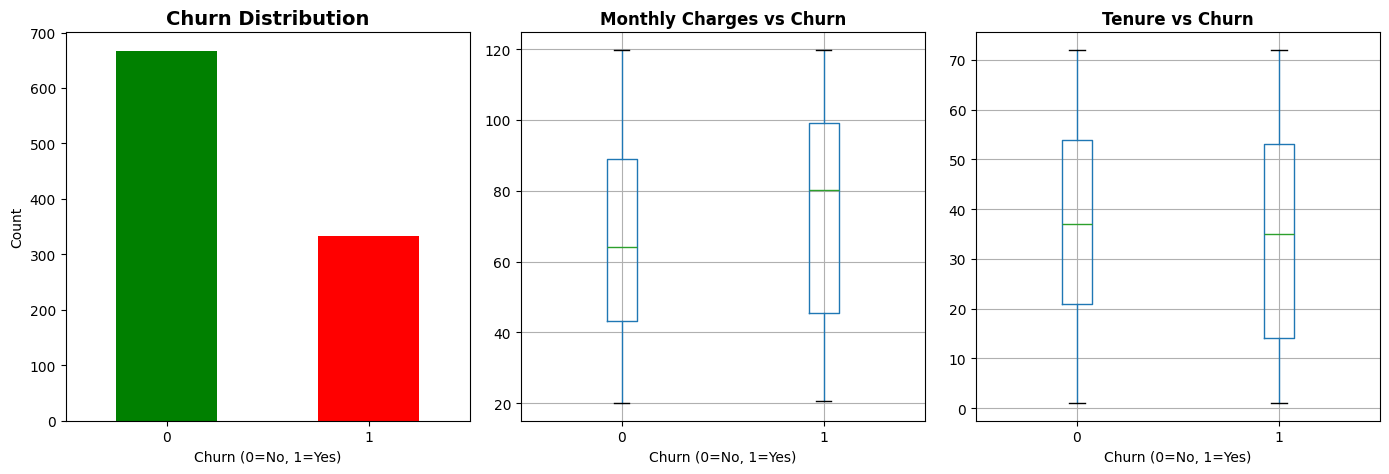


Key Insights:
Average tenure (No Churn): 37.5 months
Average tenure (Churn): 35.0 months
Average charges (No Churn): $66.14
Average charges (Churn): $73.56

✓ Phase 4 Complete!



In [4]:
# ============================================================================
# PHASE 4: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================
print("PHASE 4: EXPLORATORY DATA ANALYSIS")
print("="*70)

# 1. Target Distribution
print("\nChurn Distribution:")
print(y.value_counts())
print(f"\nChurn Rate: {y.mean()*100:.1f}%")

# 2. Visualize Churn
plt.figure(figsize=(14, 5))

# Plot 1: Churn Count
plt.subplot(1, 3, 1)
y.value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Churn Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Plot 2: Monthly Charges by Churn
plt.subplot(1, 3, 2)
df_vis = df.copy()
df_vis['Churn'] = y
df_vis.boxplot(column='MonthlyCharges', by='Churn', ax=plt.gca())
plt.title('Monthly Charges vs Churn', fontweight='bold')
plt.suptitle('')  # Remove default title
plt.xlabel('Churn (0=No, 1=Yes)')

# Plot 3: Tenure by Churn
plt.subplot(1, 3, 3)
df_vis.boxplot(column='Tenure', by='Churn', ax=plt.gca())
plt.title('Tenure vs Churn', fontweight='bold')
plt.suptitle('')
plt.xlabel('Churn (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

# 3. Key Statistics
print("\n" + "="*70)
print("Key Insights:")
print("="*70)
print(f"Average tenure (No Churn): {df_vis[df_vis['Churn']==0]['Tenure'].mean():.1f} months")
print(f"Average tenure (Churn): {df_vis[df_vis['Churn']==1]['Tenure'].mean():.1f} months")
print(f"Average charges (No Churn): ${df_vis[df_vis['Churn']==0]['MonthlyCharges'].mean():.2f}")
print(f"Average charges (Churn): ${df_vis[df_vis['Churn']==1]['MonthlyCharges'].mean():.2f}")

print("\n✓ Phase 4 Complete!\n")


In [5]:
# ============================================================================
# PHASE 5: MODEL BUILDING
# ============================================================================
print("PHASE 5: MODEL BUILDING")
print("="*70)

# Step 1: Split data into training and testing sets
print("\nSplitting data: 80% training, 20% testing")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✓ Training set: {len(X_train)} customers")
print(f"✓ Testing set: {len(X_test)} customers")

# Step 2: Build the model
print("\nTraining Random Forest model...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("✓ Model trained successfully!")

# Step 3: Make predictions
print("\nMaking predictions...")
y_pred = model.predict(X_test)
print("✓ Predictions complete!")

# Step 4: Evaluate the model
print("\n" + "="*70)
print("MODEL PERFORMANCE")
print("="*70)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy*100:.2f}%")
print(f"This means the model is correct {accuracy*100:.1f}% of the time!\n")

print("Detailed Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Step 5: Feature Importance
print("\n" + "="*70)
print("MOST IMPORTANT FEATURES")
print("="*70)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

print("\n✓ Phase 5 Complete!\n")


PHASE 5: MODEL BUILDING

Splitting data: 80% training, 20% testing
✓ Training set: 800 customers
✓ Testing set: 200 customers

Training Random Forest model...
✓ Model trained successfully!

Making predictions...
✓ Predictions complete!

MODEL PERFORMANCE

Accuracy: 66.50%
This means the model is correct 66.5% of the time!

Detailed Report:
              precision    recall  f1-score   support

    No Churn       0.72      0.80      0.76       132
       Churn       0.51      0.41      0.46        68

    accuracy                           0.67       200
   macro avg       0.62      0.60      0.61       200
weighted avg       0.65      0.67      0.66       200


MOST IMPORTANT FEATURES
          Feature  Importance
   MonthlyCharges    0.287867
     TotalCharges    0.268508
           Tenure    0.252956
Contract_One year    0.054336
Contract_Two year    0.051263
          Partner    0.031956
           Gender    0.030002
    SeniorCitizen    0.023112

✓ Phase 5 Complete!



PHASE 6: VISUALIZATION


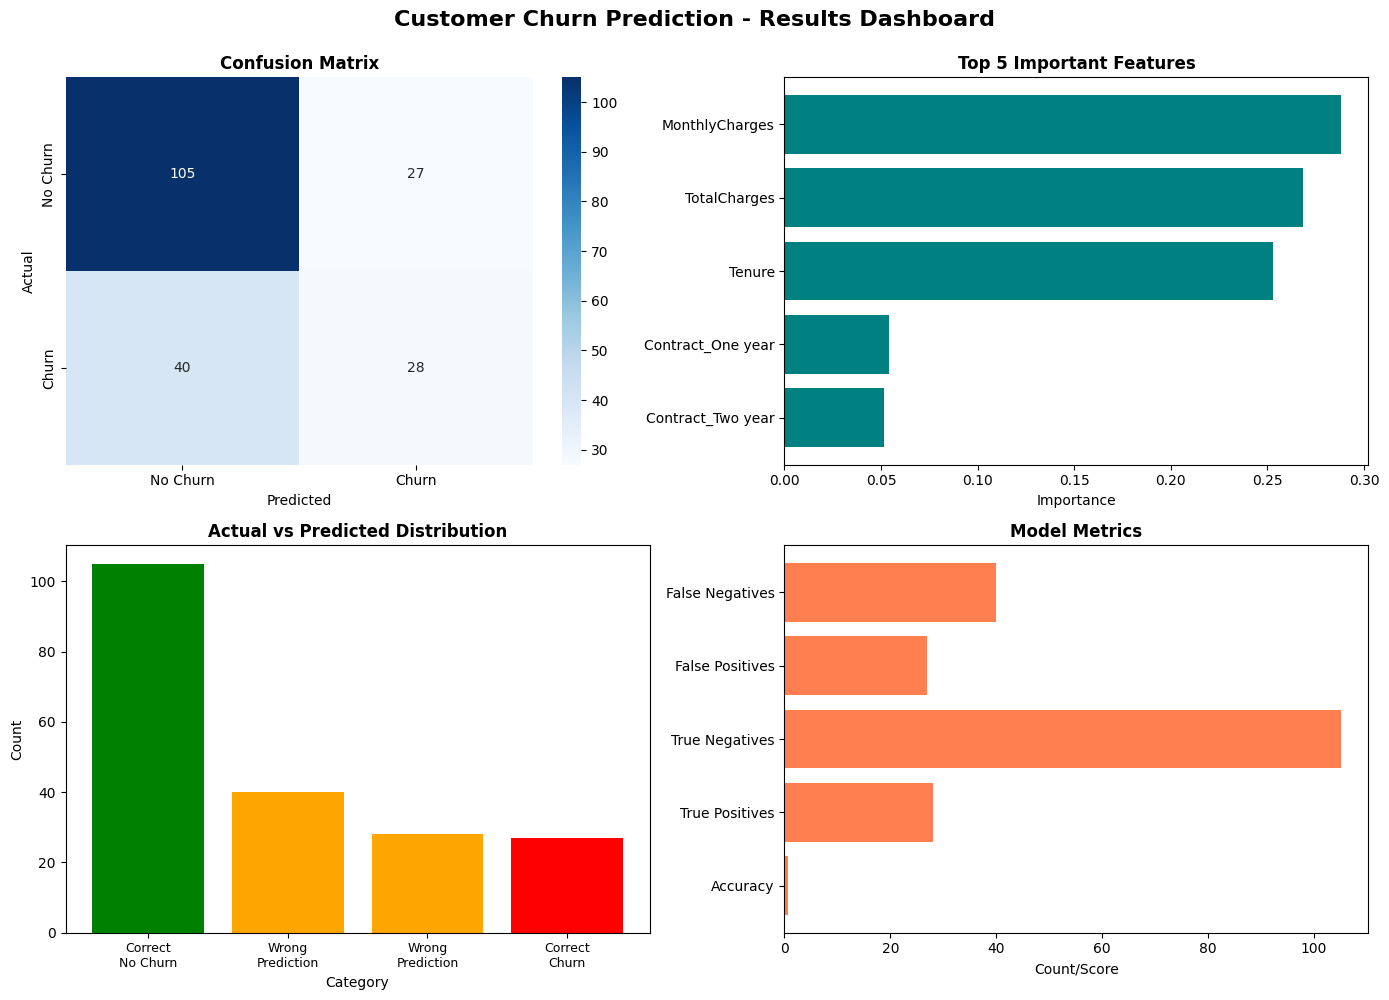

✓ All visualizations created!

✓ Phase 6 Complete!

PROJECT COMPLETE - SUMMARY

✓ Total Customers Analyzed: 1000
✓ Model Accuracy: 66.50%
✓ Customers Correctly Identified: 133/200
✓ Most Important Factor: MonthlyCharges

BUSINESS IMPACT:
- Can now identify customers likely to leave
- Company can offer special deals to at-risk customers
- Saves money by preventing customer loss

NEXT STEPS:
1. Deploy model to production
2. Monitor customer behavior in real-time
3. Create retention campaigns for high-risk customers



In [6]:
# ============================================================================
# PHASE 6: VISUALIZATION
# ============================================================================
print("PHASE 6: VISUALIZATION")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
axes[0, 0].set_title('Confusion Matrix', fontweight='bold', fontsize=12)
axes[0, 0].set_ylabel('Actual')
axes[0, 0].set_xlabel('Predicted')

# 2. Feature Importance
top_features = feature_importance.head(5)
axes[0, 1].barh(top_features['Feature'], top_features['Importance'], color='teal')
axes[0, 1].set_title('Top 5 Important Features', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Importance')
axes[0, 1].invert_yaxis()

# 3. Actual vs Predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_counts = comparison.value_counts().reset_index(name='count')
axes[1, 0].bar(range(len(comparison_counts)), comparison_counts['count'], 
               color=['green', 'orange', 'orange', 'red'])
axes[1, 0].set_title('Actual vs Predicted Distribution', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticks(range(len(comparison_counts)))
axes[1, 0].set_xticklabels(['Correct\nNo Churn', 'Wrong\nPrediction', 
                             'Wrong\nPrediction', 'Correct\nChurn'], fontsize=9)

# 4. Model Metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'True Positives': cm[1, 1],
    'True Negatives': cm[0, 0],
    'False Positives': cm[0, 1],
    'False Negatives': cm[1, 0]
}
axes[1, 1].barh(list(metrics.keys()), list(metrics.values()), color='coral')
axes[1, 1].set_title('Model Metrics', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Count/Score')

plt.suptitle('Customer Churn Prediction - Results Dashboard', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✓ All visualizations created!")
print("\n✓ Phase 6 Complete!\n")

# ============================================================================
# PROJECT SUMMARY
# ============================================================================
print("="*70)
print("PROJECT COMPLETE - SUMMARY")
print("="*70)
print(f"""
✓ Total Customers Analyzed: {len(df)}
✓ Model Accuracy: {accuracy*100:.2f}%
✓ Customers Correctly Identified: {int(accuracy * len(y_test))}/{len(y_test)}
✓ Most Important Factor: {feature_importance.iloc[0]['Feature']}

BUSINESS IMPACT:
- Can now identify customers likely to leave
- Company can offer special deals to at-risk customers
- Saves money by preventing customer loss

NEXT STEPS:
1. Deploy model to production
2. Monitor customer behavior in real-time
3. Create retention campaigns for high-risk customers
""")
print("="*70)
